# **PIP INSTALLS**

In [ ]:
!pip install yfinance matplotlib patool kaggle opendatasets --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.1 MB/s eta 0:00:00


# **IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.font_manager as font_manager

# **Cyber Punk Theme to Plot**

In [ ]:
cyberpunk_theme = {
    'axes.edgecolor': 'white',
    'axes.facecolor': '#1d1f21',
    'axes.labelcolor': 'white',
    'axes.titlecolor': 'white',
    'figure.facecolor': '#1d1f21',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'grid.color': 'gray',
    'grid.linestyle': ':'
}
fe = font_manager.FontEntry(
    fname='/Cyberpunk.ttf',
    name='cyberpunk')
font_manager.fontManager.ttflist.insert(0, fe)
plt.style.use(cyberpunk_theme)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadshocker","key":"844d81329b85cce7ed75d7f73fa7d456"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub
import patoolib
! kaggle datasets download debashis74017/nifty-50-minute-data
patoolib.extract_archive('/content/nifty-50-minute-data.zip')

Dataset URL: https://www.kaggle.com/datasets/debashis74017/nifty-50-minute-data
License(s): CC0-1.0
100% 153M/153M [00:02<00:00, 67.2MB/s]
100% 153M/153M [00:02<00:00, 57.4MB/s]


INFO patool: Extracting /content/nifty-50-minute-data.zip ...
INFO:patool:Extracting /content/nifty-50-minute-data.zip ...
INFO patool: running /usr/bin/7z x -aou -o./Unpack_6__l2zja -- /content/nifty-50-minute-data.zip
INFO:patool:running /usr/bin/7z x -aou -o./Unpack_6__l2zja -- /content/nifty-50-minute-data.zip
INFO patool: ... /content/nifty-50-minute-data.zip extracted to `nifty-50-minute-data' (multiple files in root).
INFO:patool:... /content/nifty-50-minute-data.zip extracted to `nifty-50-minute-data' (multiple files in root).


'nifty-50-minute-data'

In [ ]:

data = pd.read_csv('/content/nifty-50-minute-data/NIFTY 50_minute.csv')


# **PLOT GRAPTHS OF DATA**

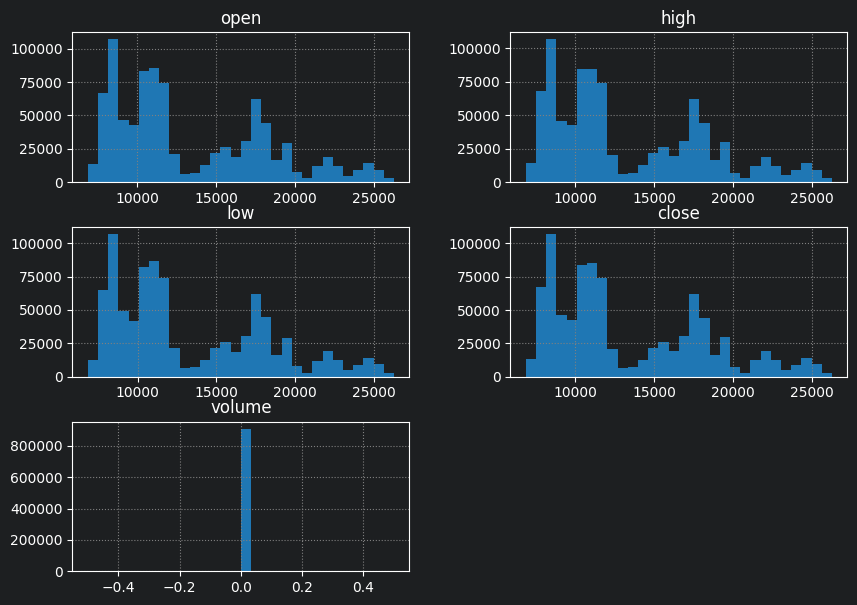

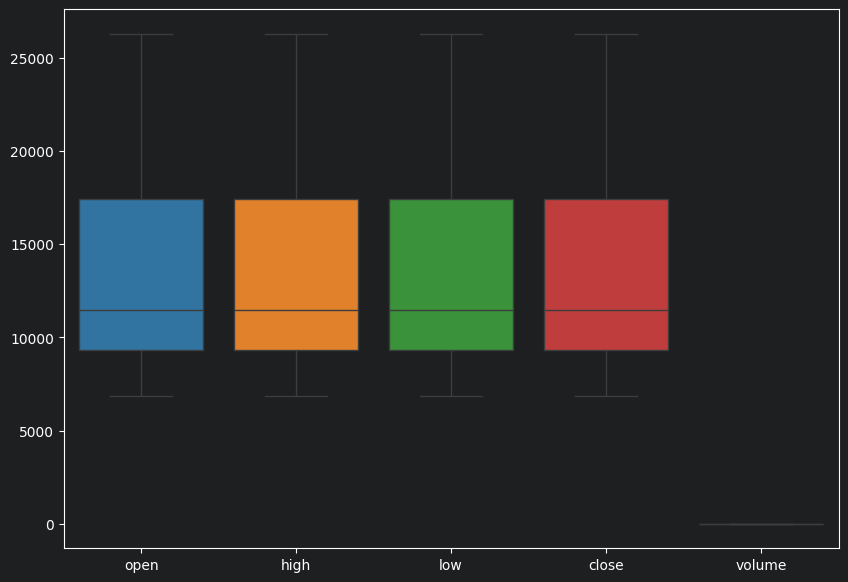

<Axes: xlabel='date', ylabel='close'>

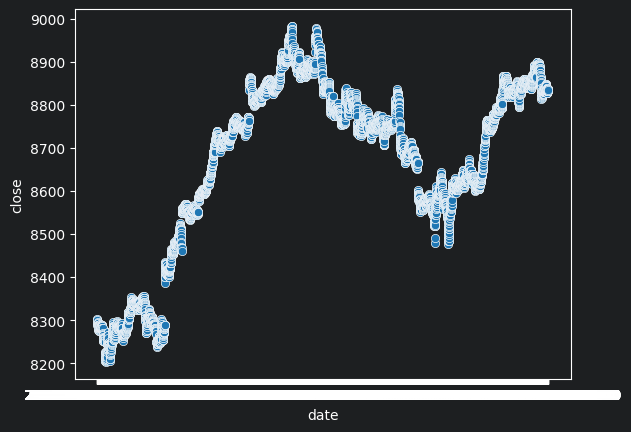

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(bins=30, figsize=(10, 7))
plt.show()

plt.figure(figsize=(10, 7))
sns.boxplot(data=data)
plt.show()


data = data[:10000] #Delete this with higher memory
plt.figure()
sns.scatterplot(x='date', y='close', data=data,)


# **Plot Rolling mean and standard deviation**

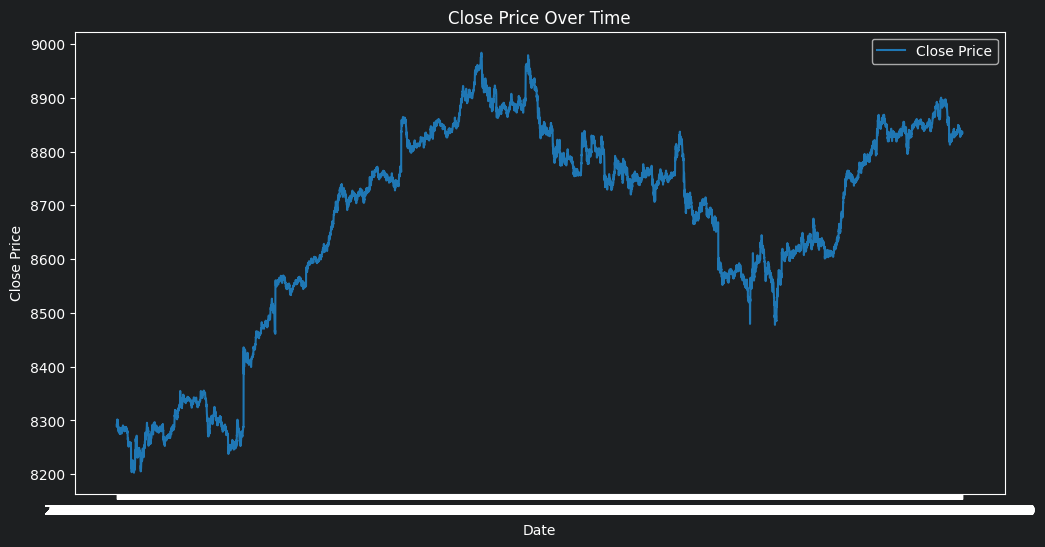

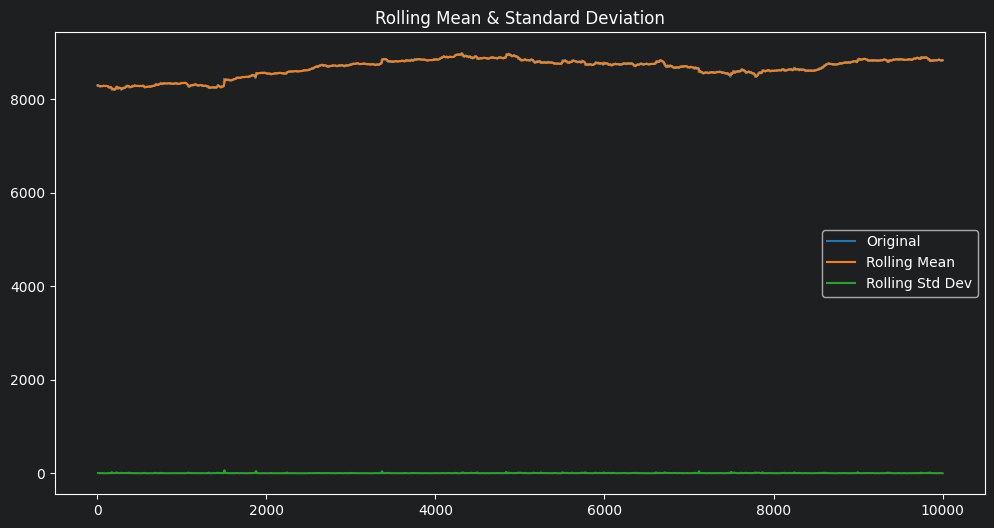

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

rolling_mean = data['close'].rolling(window=12).mean()
rolling_std = data['close'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

# **Data Loading & Indicators**

In [ ]:
df = pd.read_csv('/content/nifty-50-minute-data/NIFTY 50_minute.csv', parse_dates=['date'], index_col='date')
df['MA20'] = df['close'].rolling(window=20).mean().fillna(method='bfill')
df['MA50'] = df['close'].rolling(window=50).mean().fillna(method='bfill')

<ipython-input-10-0285c6702f63>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA20'] = df['close'].rolling(window=20).mean().fillna(method='bfill')
<ipython-input-10-0285c6702f63>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA50'] = df['close'].rolling(window=50).mean().fillna(method='bfill')


In [ ]:
df

,open,high,low,close,volume,MA20,MA50
date,,,,,,,
2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0,8293.3275,8286.298
2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0,8293.3275,8286.298
2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0,8293.3275,8286.298
2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0,8293.3275,8286.298
2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0,8293.3275,8286.298
...,...,...,...,...,...,...,...
2024-11-08 15:25:00,24135.00,24135.80,24125.95,24126.70,0,24150.7525,24154.120
2024-11-08 15:26:00,24126.50,24126.80,24114.35,24116.80,0,24148.9375,24153.789
2024-11-08 15:27:00,24119.15,24122.10,24113.45,24116.70,0,24146.9600,24153.434


In [ ]:
df['MA20'] = df['close'].rolling(window=20).mean().fillna(method='bfill')
df['MA50'] = df['close'].rolling(window=50).mean().fillna(method='bfill')

<ipython-input-12-80253f7c936f>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA20'] = df['close'].rolling(window=20).mean().fillna(method='bfill')
<ipython-input-12-80253f7c936f>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA50'] = df['close'].rolling(window=50).mean().fillna(method='bfill')


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['close', 'MA20', 'MA50']])

# **TRAIN & VALIDATION & TEST DATA SPLIT**

In [ ]:
train_size = int(len(df_scaled) * 0.7)
val_size = int(len(df_scaled) * 0.15)
test_size = len(df_scaled) - train_size - val_size

train_data = df_scaled[:train_size]
val_data = df_scaled[train_size:train_size + val_size]
test_data = df_scaled[train_size + val_size:]

# **Create Sequences**

In [ ]:
def create_sequences(data, seq_len, pred_len):
    X, y = [], []
    total_length = seq_len + pred_len
    print("Data shape:", data.shape)  # This and 3 lines below helps to Debug
    print("Expected sequence length:", seq_len)
    print("Expected prediction length:", pred_len)
    print("Total required per sequence:", total_length)

    if total_length > len(data):
        raise ValueError("The total length of input and output sequences exceeds the available data points.")

    for i in range(len(data) - total_length + 1):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len:i + seq_len + pred_len, 0])
    return np.array(X), np.array(y)

seq_len = 120   # change to 720 if you have the memory
pred_len = 60  # change to 390

try:
    X_train, y_train = create_sequences(train_data, seq_len, pred_len)
    X_val, y_val = create_sequences(val_data, seq_len, pred_len)
    X_test, y_test = create_sequences(test_data, seq_len, pred_len)
except Exception as e:
    print("Error during sequence creation:", str(e))

Data shape: (636524, 3)
Expected sequence length: 120
Expected prediction length: 60
Total required per sequence: 180
Data shape: (136398, 3)
Expected sequence length: 120
Expected prediction length: 60
Total required per sequence: 180
Data shape: (136399, 3)
Expected sequence length: 120
Expected prediction length: 60
Total required per sequence: 180


# **Model Definition**

In [ ]:
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(seq_len, X_train.shape[2])),
    Dropout(0.3),
    LSTM(256),
    Dropout(0.3),
    Dense(pred_len)
])
model.compile(loss='mse', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 256)            │         266,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 60)                  │          15,420 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 806,972 (3.08 MB)

 Trainable params: 806,972 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

# **Defining Callbacks**

In [ ]:
ckpt = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# **Training**

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64,
                    validation_data=(X_val, y_val),
                    callbacks=[ckpt, reduce_lr], verbose=1)
#change epochs to 150 if you have the memory (Again...)


Epoch 1/50
9943/9943 ━━━━━━━━━━━━━━━━━━━━ 257s 25ms/step - loss: 5.7250e-04 - val_loss: 2.2192e-05 - learning_rate: 0.0010
Epoch 2/50
9943/9943 ━━━━━━━━━━━━━━━━━━━━ 260s 25ms/step - loss: 5.4970e-05 - val_loss: 2.8825e-05 - learning_rate: 0.0010
Epoch 3/50
9943/9943 ━━━━━━━━━━━━━━━━━━━━ 263s 25ms/step - loss: 4.8161e-05 - val_loss: 2.6417e-05 - learning_rate: 0.0010
Epoch 4/50
9943/9943 ━━━━━━━━━━━━━━━━━━━━ 255s 26ms/step - loss: 4.4383e-05 - val_loss: 8.8115e-06 - learning_rate: 0.0010
Epoch 5/50
9943/9943 ━━━━━━━━━━━━━━━━━━━━ 261s 26ms/step - loss: 3.8209e-05 - val_loss: 1.6591e-05 - learning_rate: 5.0000e-04
Epoch 6/50
9943/9943 ━━━━━━━━━━━━━━━━━━━━ 262s 26ms/step - loss: 3.7473e-05 - val_loss: 2.4396e-05 - learning_rate: 5.0000e-04
Epoch 7/50
9943/9943 ━━━━━━━━━━━━━━━━━━━━ 256s 26ms/step - loss: 3.7253e-05 - val_loss: 1.8354e-05 - learning_rate: 5.0000e-04
Epoch 8/50
9943/9943 ━━━━━━━━━━━━━━━━━━━━ 262s 26ms/step - loss: 3.5251e-05 - val_loss: 1.7809e-05 - learning_rate: 2.5000e-04


# **Evaluation**

In [ ]:
model.load_weights('model.keras')  # Load best model
preds = model.predict(X_test)
mse = mean_squared_error(y_test.reshape(-1), preds.reshape(-1))
print(f"Overall MSE: {mse}")


4257/4257 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step
Overall MSE: 0.025405116382271893


# **Plotting Predictions**

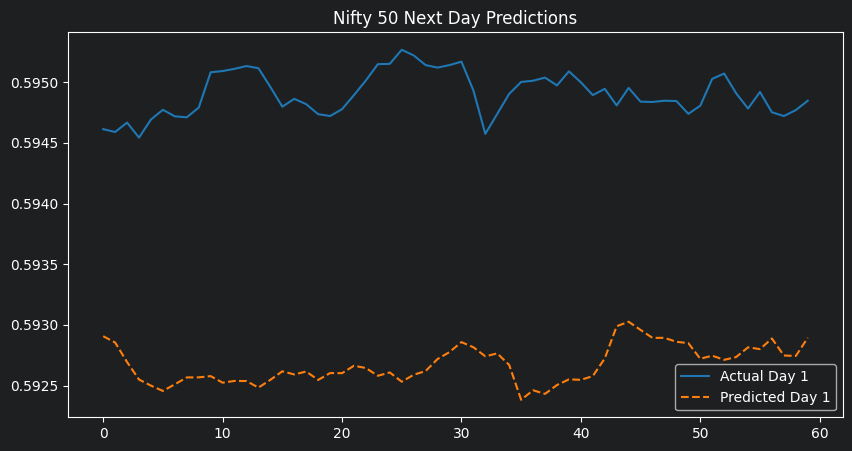

In [ ]:
plt.figure(figsize=(10, 5))
n = 1  # number of days to plot
for i in range(n):
    plt.plot(np.arange(i * pred_len, (i+1) * pred_len), y_test[i], label=f'Actual Day {i+1}')
    plt.plot(np.arange(i * pred_len, (i+1) * pred_len), preds[i], '--', label=f'Predicted Day {i+1}')
plt.title("Nifty 50 Next Day Predictions")
plt.legend()
plt.show()